# Lesson 1

Image recognition machine learning tool; 
Determining different tennis players

First find images off all tennis players

In [25]:
%%bash
#!/bin/bash

VAR1="Novak_Djokovic"
VAR2="Rafael_Nadal"
VAR3="Alexander_Zverev"
VAR4="Roger_Federer"
VAR5="Juan_Martin_del_Potro"
VAR6="Kevin_Anderson"
VAR7="Kei_Nishikori"
VAR8="Dominic_Thiem"
VAR9="John_Isner"
VAR10="Stefanos_Tsitsipas"

for tennisPlayer in $VAR1 $VAR2 $VAR3 $VAR4 $VAR5 $VAR6 $VAR7 $VAR8 $VAR9 $VAR10
do 
googleimagesdownload -pr $tennisPlayer -f "jpg" -k "$tennisPlayer tennis player" -s medium -l 200 -o data/tennis -i train/$tennisPlayer -cd /usr/bin/chromedriver

rename 's/\.(.*)/.jpg/' data/tennis/train/$tennisPlayer/*

done


Item no.: 1 --> Item name = Novak_Djokovic tennis player
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> Novak_Djokovic 1. 152052-004-a6d7becd.jpg
Completed Image ====> Novak_Djokovic 2. novakdjokovic7.jpg
Completed Image ====> Novak_Djokovic 3. world-number-four-tennis-player-novak-djokovic..jpg
Completed Image ====> Novak_Djokovic 4. novak-djokovic-tennis-players-are-some-of-the-cleanest-athletes.jpg
Completed Image ====> Novak_Djokovic 5. novak-djokovic-slammed-the-wimbledon-crowd-986129.jpg
Completed Image ====> Novak_Djokovic 6. djokovic-novak-1428502277.jpg
Completed Image ====> Novak_Djokovic 7. novak-djokovic1.jpg
Completed Image ====> Novak_Djokovic 8. 9-novak-djokovic-wimbledon-2010.jpg
Completed Image ====> Novak_Djokovic 9. _96689004_djokovic_reuters.jpg
Completed Image ====> Novak_Djokovic 10. lead_720_405.jpg
Completed Image ====> Novak_Djokovic 11. novak-djokovic-530659.jpg
Complet

In [27]:
for item in ["Novak_Djokovic","Rafael_Nadal","Alexander_Zverev","Roger_Federer","Juan_Martin_del_Potro","Kevin_Anderson","Kei_Nishikori","Dominic_Thiem","John_Isner", "Stefanos_Tsitsipas"]:
    for image in os.listdir('/notebooks/course-v3/nbs/dl1_mine/data/tennis/train/'+item):

        try:
            img =PIL.Image.open('/notebooks/course-v3/nbs/dl1_mine/data/tennis/train/'+item+'/'+image)
            img.format
        except:
            print(image)
            os.remove('/notebooks/course-v3/nbs/dl1_mine/data/tennis/train/'+item+'/'+image)
            


In [28]:
ls

Lesson-1-tennis.ipynb  data/


In [29]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [30]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [31]:
pwd

'/notebooks/course-v3/nbs/dl1_mine'

In [32]:
path = Path('/notebooks/course-v3/nbs/dl1_mine/data/tennis')
tfms = get_transforms(do_flip=False)


In [33]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=256, valid_pct=0.2)

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [34]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [35]:
learn.fit_one_cycle(8)


epoch,train_loss,valid_loss,error_rate
1,2.686438,2.117779,0.771277
2,2.306085,1.661971,0.582447
3,1.977916,1.565054,0.534574
4,1.751240,1.519975,0.492021
5,1.559386,1.444278,0.470745
6,1.415662,1.430619,0.478723
7,1.321666,1.424036,0.468085
8,1.236948,1.424275,0.470745


In [36]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

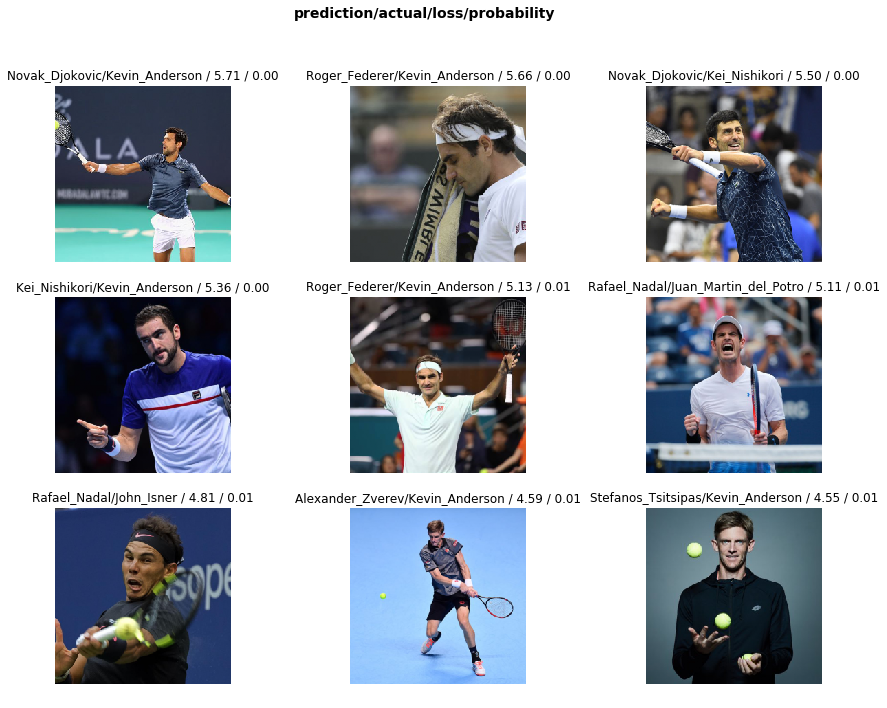

In [37]:
interp.plot_top_losses(9, figsize=(15,11))

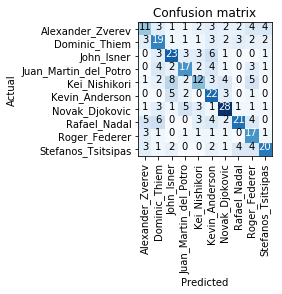

In [177]:
interp.plot_confusion_matrix()

In [178]:
len(interp.pred_class)

367

Actual: Juan_Martin_del_Potro
Predicted: Novak_Djokovic
% Confidence: tensor(0.4020)


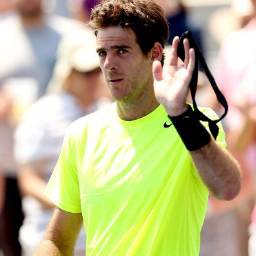

In [80]:
3
num =96

print('Actual:',learn.data.valid_ds[num][1])
print('Predicted:',data.classes[interp.pred_class[num]])
print('% Confidence:',interp.probs[num][interp.pred_class[num]])
learn.data.valid_ds[num][0]


In [197]:
learn.save('my_tennis_model')

In [7]:
learn.load('my_tennis_model')

RuntimeError: Error(s) in loading state_dict for Sequential:
	size mismatch for 1.8.weight: copying a param with shape torch.Size([10, 512]) from checkpoint, the shape in current model is torch.Size([3, 512]).
	size mismatch for 1.8.bias: copying a param with shape torch.Size([10]) from checkpoint, the shape in current model is torch.Size([3]).